##### We are here going to use Box-Cox transform and liner regression for the model

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [3]:
df = pd.read_csv('concrete_data.csv')
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [4]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
X = df.drop(columns= ['Strength'])
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.6460658599490001

In [7]:
# Cross checking with cross val score
lr = LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

0.4609940491662865

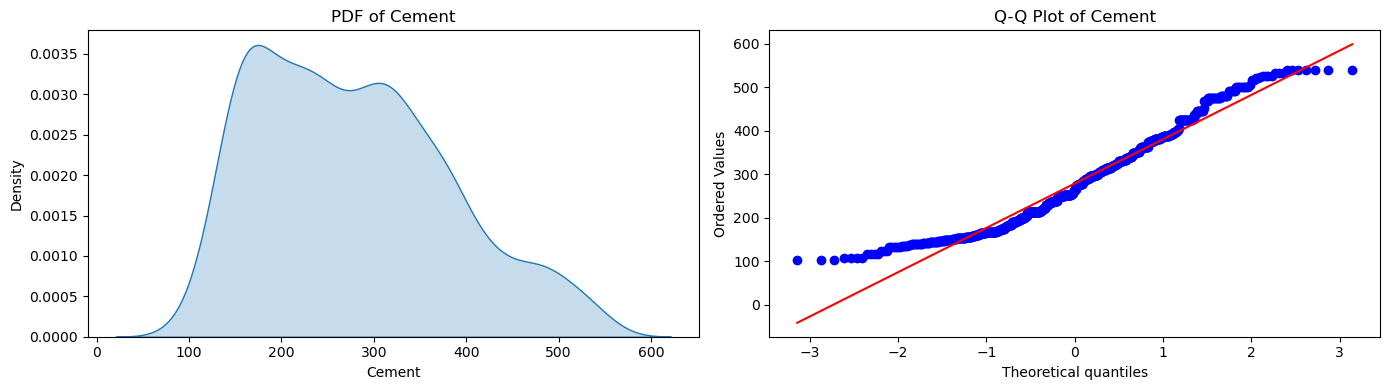

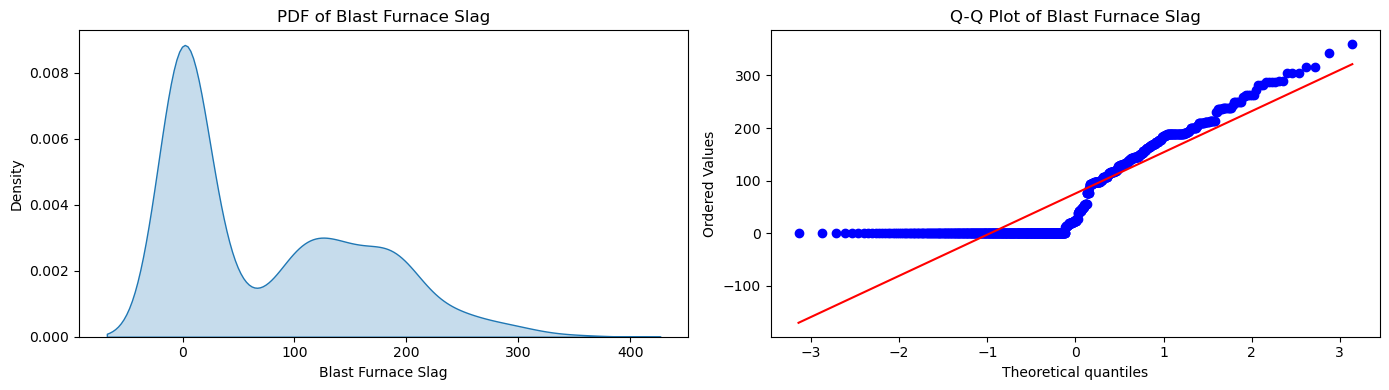

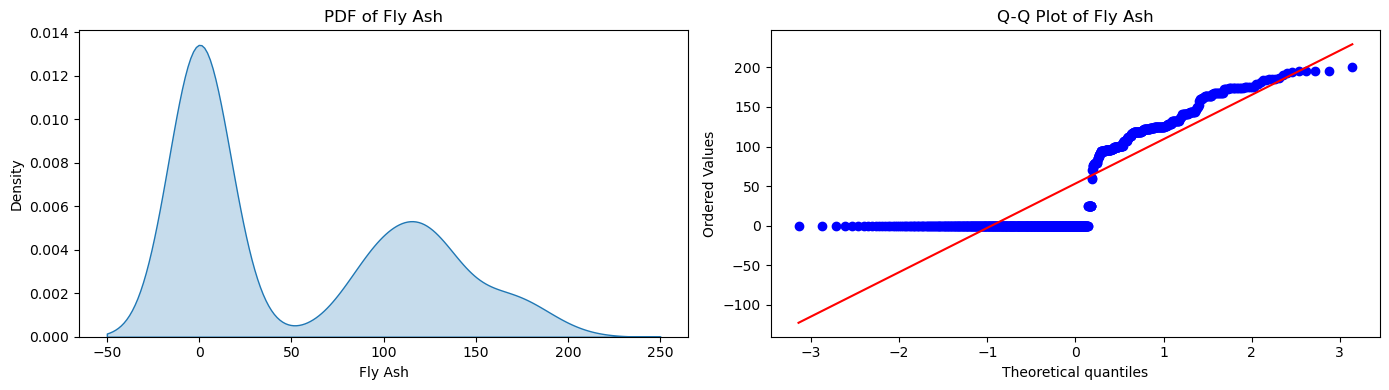

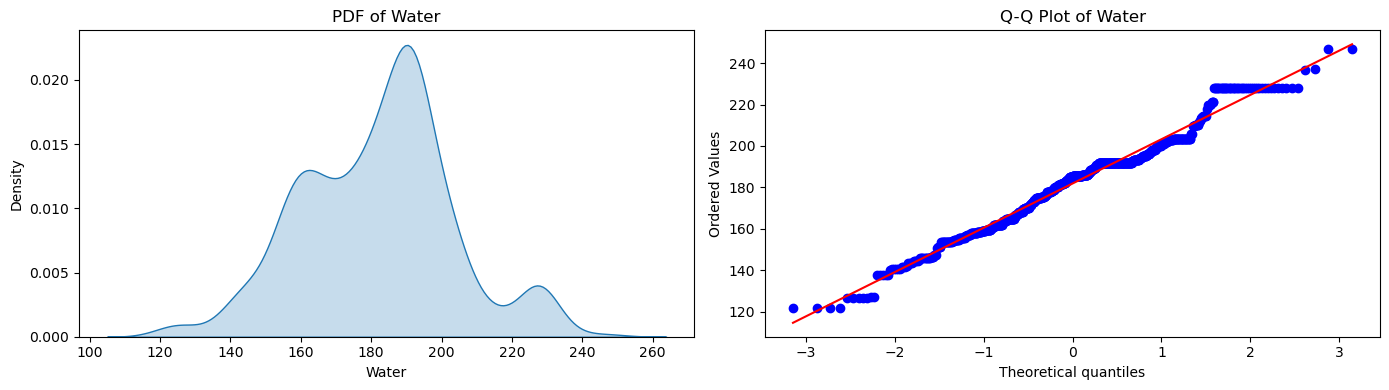

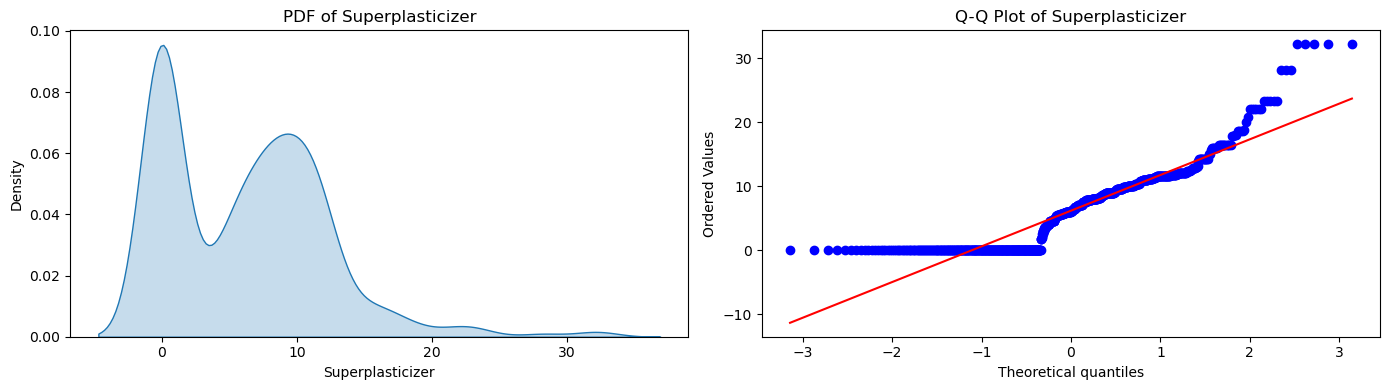

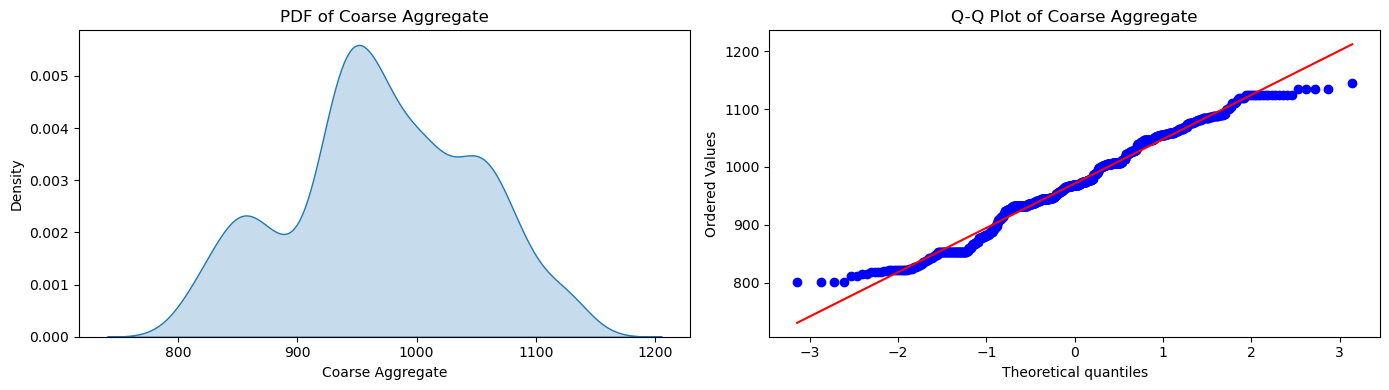

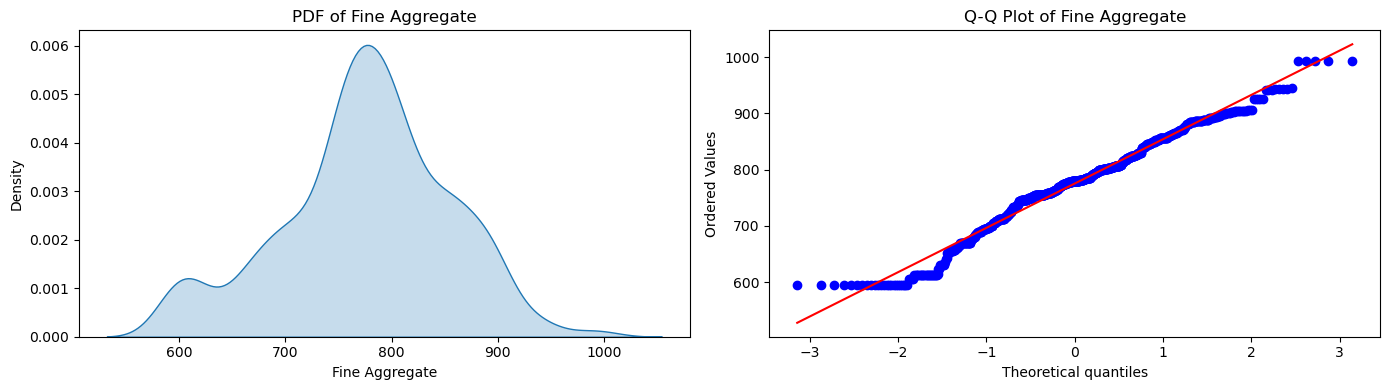

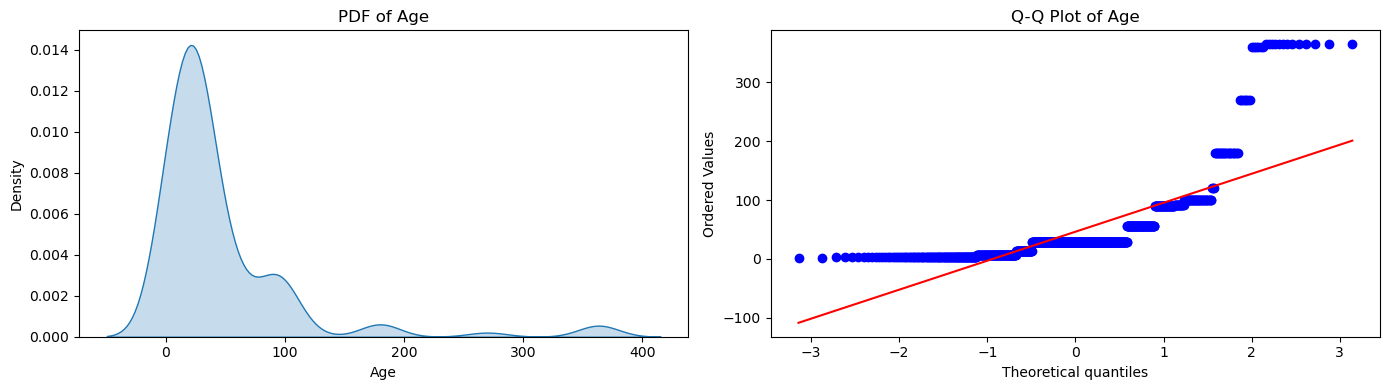

In [8]:
for col in X_train.columns:
    plt.figure(figsize=(14, 4))

    # PDF / KDE Plot
    plt.subplot(121)
    sns.kdeplot(X_train[col].dropna(), fill=True)  # dropna() to avoid errors if there are NaNs
    plt.title(f'PDF of {col}')

    # Q-Q Plot
    plt.subplot(122)
    stats.probplot(X_train[col].dropna(), dist='norm', plot=plt)
    plt.title(f'Q-Q Plot of {col}')

    plt.tight_layout()
    plt.show()


In [9]:
# Applying Box-Cox transform:
pt = PowerTransformer(method= 'box-cox')
X_train_transformed = pt.fit_transform(X_train+0.00001)
X_test_transformed = pt.transform(X_test+0.00001)
pd.DataFrame({'cols':X_train.columns, 'box_cox_lambda_values': pt.lambdas_ })

,cols,box_cox_lambda_values
0,Cement,0.155086
1,Blast Furnace Slag,0.030749
2,Fly Ash,-0.042741
3,Water,0.909239
4,Superplasticizer,0.115150
5,Coarse Aggregate,1.319836
6,Fine Aggregate,1.857852
7,Age,0.052256


In [10]:
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred1 = lr.predict(X_test_transformed)
r2_score(y_test,y_pred1)


0.7927819103204805

In [11]:
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.6658537926845635

In [26]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)


In [14]:
# by default power transformer takes yeo-johnson transformation 
pt1 = PowerTransformer()
X_train_transformed1 = pt1.fit_transform(X_train)
X_test_transformed1 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed1,y_train)

y_pred2 = lr.predict(X_test_transformed1)

print(r2_score(y_test, y_pred2))
pd.DataFrame({'cols' : X_train.columns, 'Yeo_Johnson_lemdas': pt1.lambdas_})

0.7948592527191902


,cols,Yeo_Johnson_lemdas
0,Cement,0.152280
1,Blast Furnace Slag,0.030196
2,Fly Ash,-0.155735
3,Water,0.908666
4,Superplasticizer,0.255642
5,Coarse Aggregate,1.320268
6,Fine Aggregate,1.859013
7,Age,0.005039


In [15]:
pt1 = PowerTransformer()
X_transformed1 = pt1.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed1,y,scoring='r2'))

0.6834625141500862

In [25]:
X_train_transformed1 = pd.DataFrame(X_train_transformed1,columns=X_train.columns)


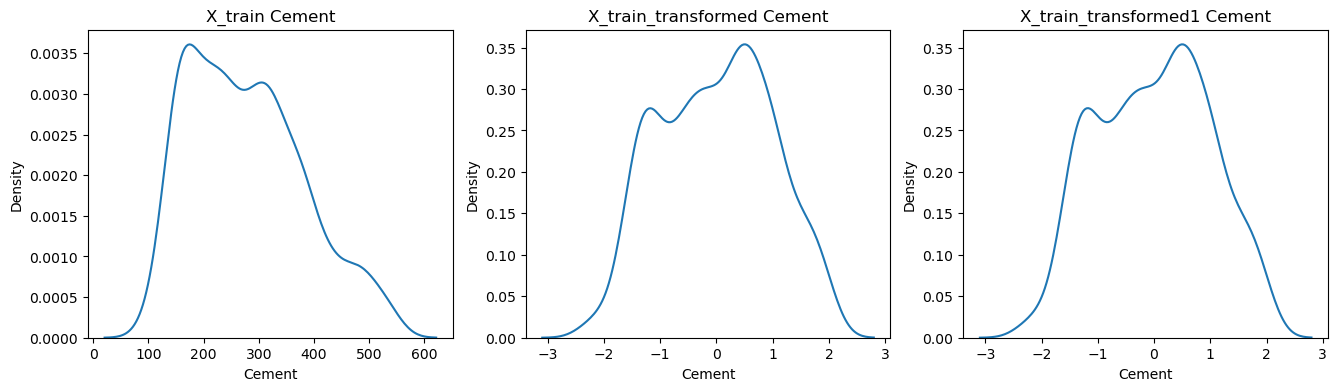

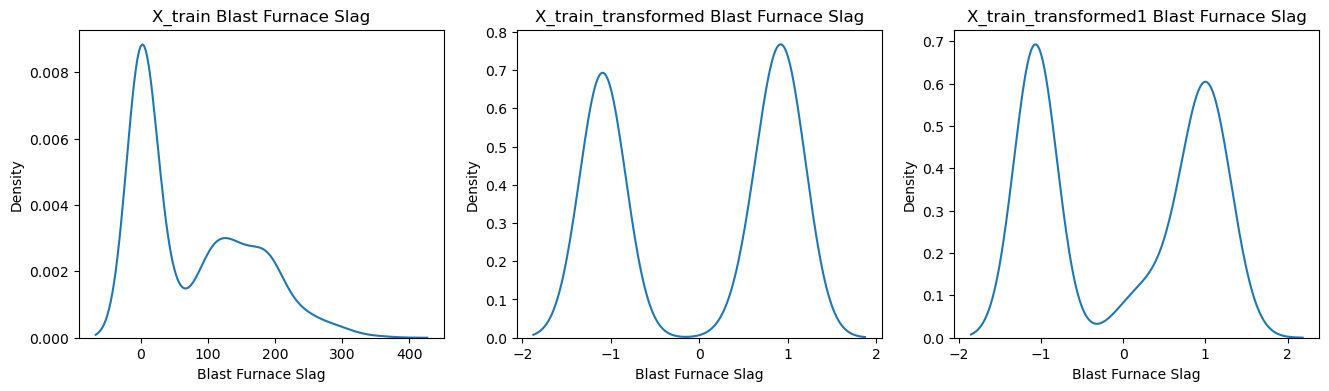

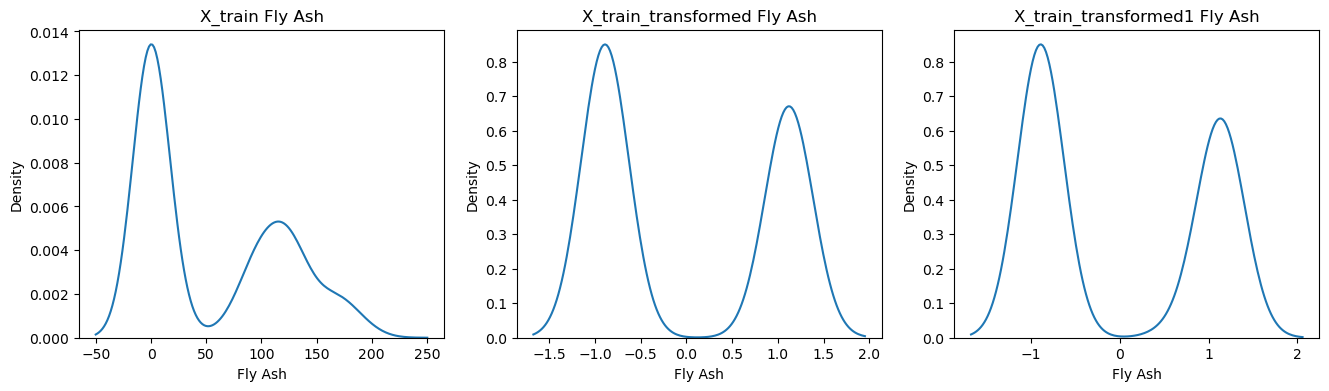

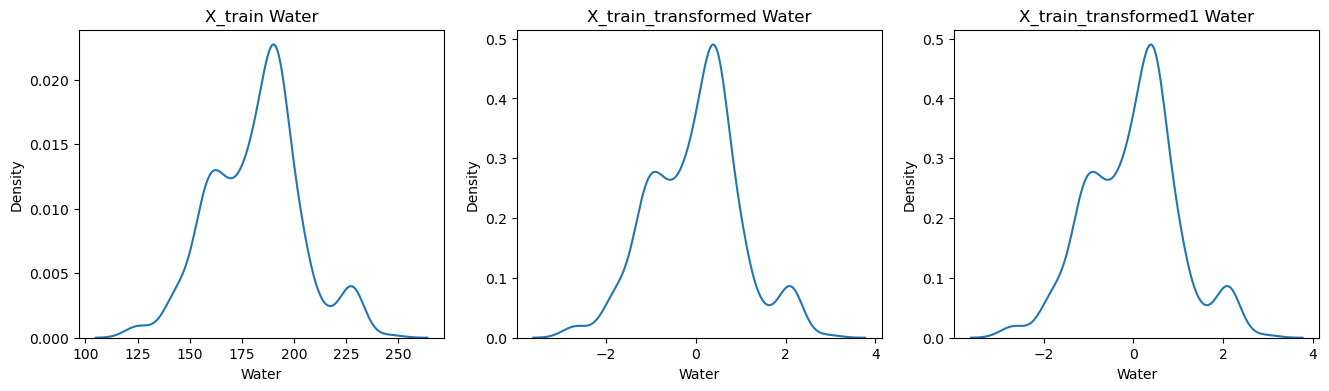

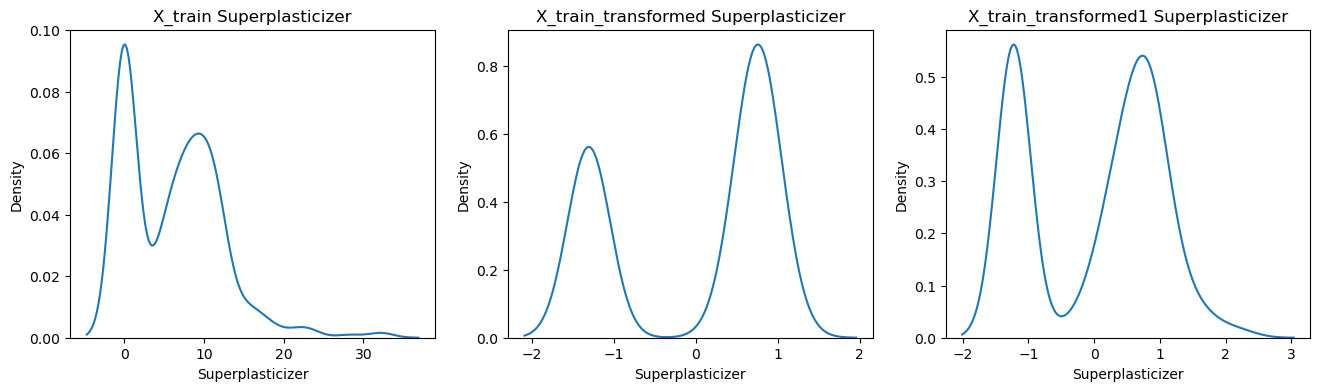

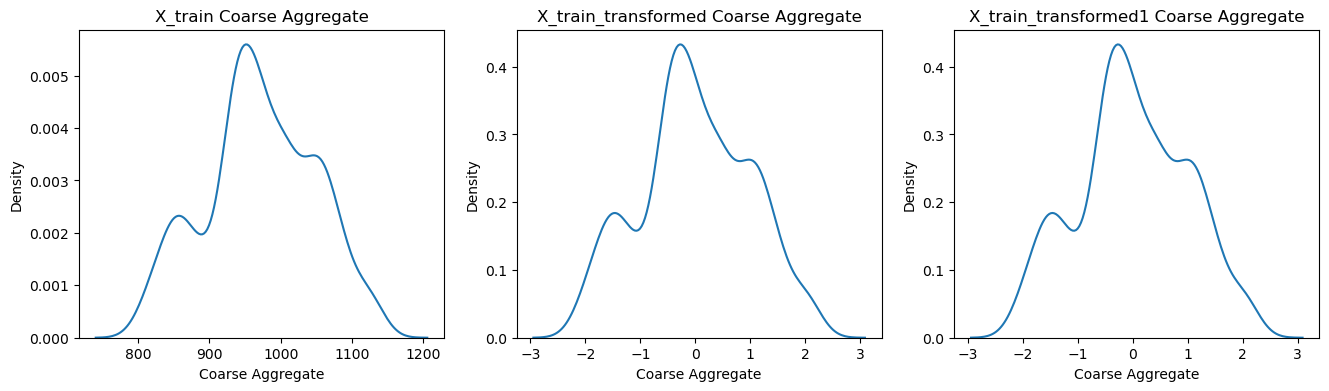

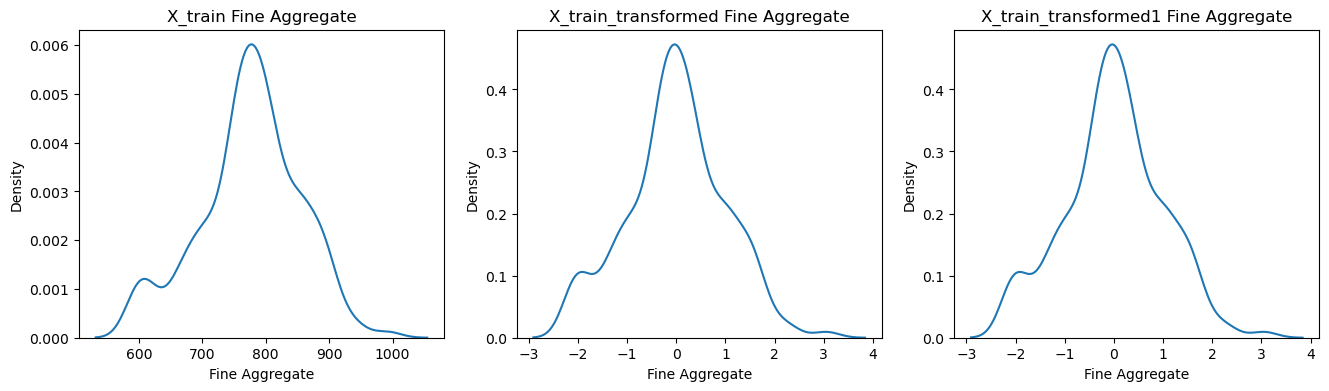

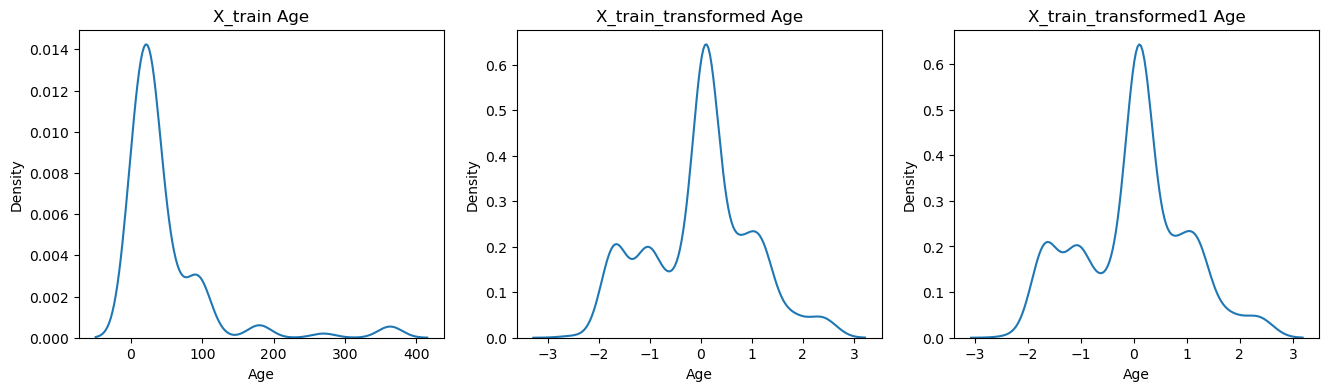

In [30]:
# Comparision
for col in X_train.columns:
    plt.figure(figsize=(16,4))
    plt.subplot(131)
    sns.kdeplot(X_train[col])
    plt.title(f'X_train {col}')
    
    plt.subplot(132)
    sns.kdeplot(X_train_transformed[col])
    plt.title(f'X_train_transformed {col}')
    
    plt.subplot(133)
    sns.kdeplot(X_train_transformed1[col])
    plt.title(f'X_train_transformed1 {col}')
    
    plt.show()

In [31]:
# comparision of lemdas between both the transformations:
pd.DataFrame({'cols': X_train.columns, 'boxCox_lambdas':pt.lambdas_, 'YeoJohnson_lambdas': pt1.lambdas_})

,cols,boxCox_lambdas,YeoJohnson_lambdas
0,Cement,0.172271,0.169544
1,Blast Furnace Slag,0.022924,0.016633
2,Fly Ash,-0.028797,-0.136480
3,Water,0.809568,0.808438
4,Superplasticizer,0.087911,0.264160
5,Coarse Aggregate,1.129167,1.129395
6,Fine Aggregate,1.829625,1.830763
7,Age,0.048975,0.001771
